The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module

## Q1. Downloading the data

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".

Download the data for January and February 2021.

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?

    1054112
    1154112
    1254112
    1354112


In [2]:
#!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-01.parquet
#!wget -P ./data https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-02.parquet

In [3]:
# temp cell of installing neccesary moduls
#!pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_01 = pd.read_parquet("./data/fhv_tripdata_2021-01.parquet")
data_02 = pd.read_parquet("./data/fhv_tripdata_2021-02.parquet")

In [6]:
data_01.sample(10)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
1059837,B00706,2021-01-29 09:02:44,2021-01-29 09:03:09,206.0,245.0,None,B00706
15205,B03046,2021-01-01 14:41:00,2021-01-01 15:28:00,214.0,221.0,None,B03046
996179,B01231,2021-01-27 17:11:34,2021-01-27 17:13:51,NaN,17.0,None,B02883
103516,B01308,2021-01-04 14:29:00,2021-01-04 14:44:00,NaN,NaN,None,B01308
763348,B02814,2021-01-21 15:58:23,2021-01-21 16:27:23,NaN,188.0,None,B02814
427338,b00833,2021-01-13 03:27:00,2021-01-13 03:39:00,NaN,NaN,None,b00833
668180,B01231,2021-01-19 12:52:21,2021-01-19 13:35:01,NaN,217.0,None,B02883
737100,B01239,2021-01-21 07:25:40,2021-01-21 07:33:39,NaN,254.0,None,B02872
118209,B03046,2021-01-05 00:19:00,2021-01-05 01:01:00,221.0,221.0,None,B03046
1115680,B01437,2021-01-30 16:15:57,2021-01-30 16:29:13,NaN,95.0,None,B01437


In [7]:
print(f"The number of records in January is: {data_01.shape[0]}")

The number of records in January is: 1154112


## Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the average trip duration in January?

    15.16
    19.16
    24.16
    29.16


In [8]:
#for this task, we will create separate columng for duration
data_01["duration"] =  round((data_01["dropOff_datetime"] - data_01["pickup_datetime"]).dt.total_seconds()/60, 2)
print(f"The average trip duration in January is: {round(data_01['duration'].mean(), 2)}")

The average trip duration in January is: 19.17


In [9]:
#to see the generated column
data_01.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.00
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.00
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.00
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.28
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.22


## Data preparation

Check the distribution of the duration variable. There are some outliers.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

{'whiskers': [<matplotlib.lines.Line2D at 0x219e7d0f190>,
 'caps': [<matplotlib.lines.Line2D at 0x219e7d20c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x219e7d0e250>],
 'medians': [<matplotlib.lines.Line2D at 0x219e7d22550>],
 'fliers': [<matplotlib.lines.Line2D at 0x219e7d22f90>],
 'means': []}

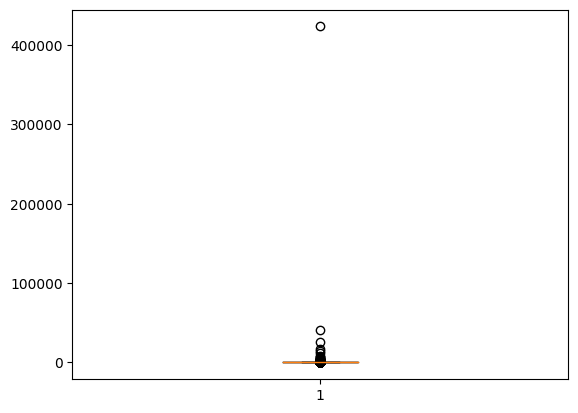

In [10]:
plt.boxplot(data_01['duration'])